### COURSERA / специализация МАШИННОЕ ОБУЧЕНИЕ И АНАЛИЗ ДАННЫХ (МФТИ)
### Курс 1: Математика и Python для анализа данных.
### Задание по программированию. Линейная алгебра: сходство текстов и аппроксимация функций
Данное задание основано на материалах секции, посвященной введению в линейную алгебру. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy и SciPy.

Вы научитесь:
- читать тексты из файла с помощью Python и разбивать их на слова;
- переводить тексты в векторные пространства, вычислять расстояния в этих пространствах;
- решать системы линейных уравнений;
- приближать любые функции с помощью многочленов.

Введение

В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Обе эти задачи еще много раз встретятся нам в специализации. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.

Материалы

Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html

Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files

Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html

Инструкция по выполнению

Данное задание состоит из двух частей. В каждой ответом будет набор чисел, который вам нужно будет ввести в соответствующее поле через пробел.

### Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:
f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)



In [15]:
!pip install plotly

/home/vibo/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/vibo/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 13.2 MB 3.5 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=b83d180e0c015b44500c67cea5e24fd459df389af38a545065d42e93465c779d
  Stored in directory: /home/vibo/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


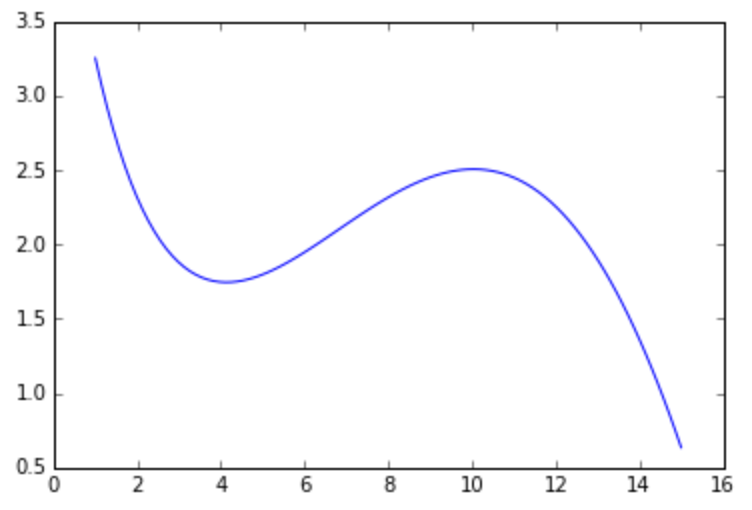

In [4]:
from IPython.display import Image
Image("Рис.png", width=500, height=500)

In [35]:
from numpy import (sin, cos, exp)
import plotly.express as px
x = np.arange(1, 15, 0.1)
def f(x):
    return sin(x/5) * exp(x/10) + 5*exp(-x/2) 
fig = px.scatter(x=x, y=f(x))
fig.show()

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.
Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

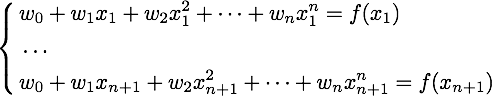

In [5]:
from IPython.display import Image
Image("Рис2.png", width=500, height=500)

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.
Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [71]:
from scipy import linalg
import numpy as np

x = np.array([1, 15])
def f(x):
    return sin(x/5) * exp(x/10) + 5*exp(-x/2) 
a = np.array([[1, 1], [1, 15]])
b = f(x)
w = scipy.linalg.solve(a, b)
print(w)
x = np.arange(1, 15.1, 0.1)
def f(x):
    return sin(x/5) * exp(x/10) + 5*exp(-x/2)
def w(x):
    return 3.43914511 - 0.18692825*x 

import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=w(x)))
fig.show()

[ 3.43914511 -0.18692825]


2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?


In [70]:
from scipy import linalg
import numpy as np

x = np.array([1, 8, 15])
def f(x):
    return sin(x/5) * exp(x/10) + 5*exp(-x/2) 
a = np.array([[1, 1, 1], [1, 8, 8**2], [1, 15, 15**2]])
b = f(x)
w = scipy.linalg.solve(a, b)
print(w)
x = np.arange(1, 15.1, 0.1)
def f(x):
    return sin(x/5) * exp(x/10) + 5*exp(-x/2)
def w(x):
    return 3.32512949 -0.06531159*x -0.00760104*(x**2)

import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=w(x)))
fig.show()

[ 3.32512949 -0.06531159 -0.00760104]


3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [75]:
from scipy import linalg
import numpy as np

x = np.array([1, 4, 10, 15])
def f(x):
    return sin(x/5) * exp(x/10) + 5*exp(-x/2) 
a = np.array([[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]])
b = f(x)
w = scipy.linalg.solve(a, b)
print(w)
x = np.arange(1, 15.1, 0.1)
def f(x):
    return sin(x/5) * exp(x/10) + 5*exp(-x/2)
def w(x):
    return 4.36264154 -1.29552587*x + 0.19333685*x**2 -0.00823565*x**3

import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=w(x)))
fig.show()        

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

### ответ: 4.36264154 -1.29552587  0.19333685 -0.00823565